In [31]:
import os.path
import glob
import cv2
import cupy
from PIL import Image


path=os.getcwd()
print(path)

img=Image.open('./GenImages/v32.00_s100.00_p50.30.jpg')
img_base=Image.open('./GenImages/v32.00_s100.00_p50.30.jpg')

img_gray=img.conver('L')

        



d:\OneDrive\Documents\GitHub\Bayesian_PendantDrop_Tensiometry


In [124]:
import os.path
import glob
import cv2

def ResizeImage(filein,width,height):
    fileout=filein.resize((width,height),Image.Resampling.LANCZOS)
    return fileout


def img2bw(img,size):
    img_rs=ResizeImage(img,size,size) #resize 
    img_gray=img_rs.convert('L') # rgb 2 gray
    array_img=np.array(img_gray) # img 2 array
    _,img_BW=cv2.threshold(array_img,0,255,cv2.THRESH_OTSU) # gray 2 bw
    return img_BW



In [125]:
def cost(img_ori,img_gen,size):
    t=0; f=0; drop_ori=0; drop_gen=0 # pixel that same(T) different(F) and original drop (drop)
    A=img2bw(img_ori,size)
    B=img2bw(img_gen,size)
    C=np.zeros((size,size))
    for i in range (size):
        #print(i)
        for j in range(size):
            #print(j)
            if A[i,j]==0:
                drop_ori=drop_ori+1
            if B[i,j]==0:
                drop_gen=drop_gen+1

            if A[i,j]==B[i,j]:
                C[i,j]=255
                t=t+1
            else:
                C[i,j]=0
                f=f+1
    accurancy=1-f/max(drop_gen,drop_ori)
    return accurancy,C


Accurancy is 0.70


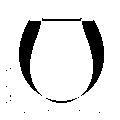

In [139]:
img_gen=Image.open('./GenImages/s55.00_v10.00_p41.39.jpg')
img_ori=Image.open('./GenImages/s55.00_v25.00_p35.04.jpg')

A=img_ori
B=img_gen
ac,C=cost(B,A,120)
print('Accurancy is %.2f'%(ac))
Image.fromarray(np.uint8(C))



d:\OneDrive\Documents\GitHub\Bayesian_PendantDrop_Tensiometry\genDrops_python\genSingleDrop.py:133: RuntimeWarning: invalid value encountered in divide
  A31 = -sigmaprime*np.diag(np.squeeze(np.sin(psi)/r**2))
d:\OneDrive\Documents\GitHub\Bayesian_PendantDrop_Tensiometry\genDrops_python\genSingleDrop.py:135: RuntimeWarning: divide by zero encountered in divide
  A33 = C*sigmaprime*D + sigmaprime*np.diag(np.squeeze(np.cos(psi)/r))
d:\OneDrive\Documents\GitHub\Bayesian_PendantDrop_Tensiometry\genDrops_python\genSingleDrop.py:138: RuntimeWarning: invalid value encountered in divide
  b3 = p0-z-sigmaprime*(C*np.dot(D,psi)+np.sin(psi)/r)


iter > 1200!
Elapsed time: 10.627986 seconds
volume =  10.0  mm^3
area =  19.863803232102  mm^2
pressure =  41.387617222626  Pa


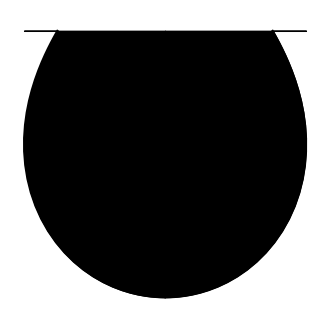

In [144]:
from genDrops_python.genSingleDrop import *

genSingleDrop(55,10,1)